In [1]:
%load_ext autotime
from  utils import *
import matplotlib.pylab as plt 

import numpy as np
from  keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [3]:
height, width = (256,256)

time: 1.45 ms


In [5]:
X_train, Y_train= load_mura_data(data_path='data/MURA-v1.1', bone_name='XR_FINGER',sample='train',target_size=(height, width))

INFO:utils.mura_utils:reading images from train, bone name: XR_FINGER
100% (5106 of 5106) |####################| Elapsed Time: 0:02:24 Time:  0:02:24
INFO:utils.util:saving to data/MURA-v1.1/train_x_XR_FINGER.pkl
INFO:utils.mura_utils:writing x_pickcle finishes
INFO:utils.util:saving to data/MURA-v1.1/train_y_XR_FINGER.pkl
INFO:utils.mura_utils:writing y_pickle finishes
INFO:utils.util:prprocess images


time: 2min 39s


In [4]:
X_valid, Y_valid= load_mura_data(data_path='data/MURA-v1.1', bone_name='XR_FINGER',sample='valid',target_size=(height, width))

INFO:utils.mura_utils:reading images from valid, bone name: XR_FINGER
100% (461 of 461) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
INFO:utils.util:saving to data/MURA-v1.1/valid_x_XR_FINGER.pkl
INFO:utils.mura_utils:writing x_pickcle finishes
INFO:utils.util:saving to data/MURA-v1.1/valid_y_XR_FINGER.pkl
INFO:utils.mura_utils:writing y_pickle finishes
INFO:utils.util:prprocess images


time: 2.71 s


In [6]:
X_train.shape

(5106, 256, 256)

time: 15 ms


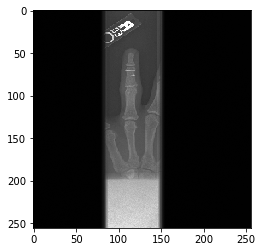

time: 330 ms


In [7]:
plt.imshow(X_train[1], cmap='gray')

### Data Preparation
reshape the data to (height, width, depth) (depth = 1 channel), Tensorflow put the depth in the end, conversely, Theano use the way of (depth, height, width ) 

In [8]:
X_train = X_train.reshape(X_train.shape[0], width, height, 1)
X_valid = X_valid.reshape(X_valid.shape[0], width, height, 1)

time: 2.57 ms


In [9]:
X_train.shape, X_valid.shape

((5106, 256, 256, 1), (461, 256, 256, 1))

time: 5.3 ms



#### one-hot convert, 2 categories 

In [10]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_valid = np_utils.to_categorical(Y_valid, 2)

time: 4.55 ms


In [11]:
Y_train.shape, Y_valid.shape


((5106, 2), (461, 2))

time: 4.49 ms


### Mode architecture definition 

In [12]:
#  Building the CNN
def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3),  activation='relu',input_shape=(width,height,1)))
    model.add(Conv2D(32, (3,3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization(scale=False, center=False))
    
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(scale=False, center=False))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(2, activation='softmax'))

    return model


model = build_model()

time: 3.2 s


#### Compiling the CNN`

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time: 118 ms


#### Fit the module 

In [ ]:
import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [ ]:
X_train_less = X_train[:32]
Y_train_less = Y_train[:32]

In [ ]:
X_train_less.shape, Y_train_less.shape

In [15]:
model.fit(X_train, Y_train, batch_size=128, epochs = 10, verbose=1)

Epoch 1/10
5106/5106 [==============================] - 27s 5ms/step - loss: 1.0475 - acc: 0.5875
Epoch 2/10
5106/5106 [==============================] - 19s 4ms/step - loss: 0.6344 - acc: 0.6486
Epoch 3/10
5106/5106 [==============================] - 19s 4ms/step - loss: 0.5942 - acc: 0.6731
Epoch 4/10
5106/5106 [==============================] - 19s 4ms/step - loss: 0.5744 - acc: 0.6966
Epoch 5/10
5106/5106 [==============================] - 19s 4ms/step - loss: 0.5431 - acc: 0.7180
Epoch 6/10
5106/5106 [==============================] - 18s 4ms/step - loss: 0.5133 - acc: 0.7405
Epoch 7/10
5106/5106 [==============================] - 18s 4ms/step - loss: 0.4660 - acc: 0.7824
Epoch 8/10
5106/5106 [==============================] - 19s 4ms/step - loss: 0.4016 - acc: 0.8210
Epoch 9/10
5106/5106 [==============================] - 18s 3ms/step - loss: 0.3160 - acc: 0.8709
Epoch 10/10
5106/5106 [==============================] - 18s 3ms/step - loss: 0.2401 - acc: 0.9036


time: 3min 15s


#### Plot loss and accuracy curves 

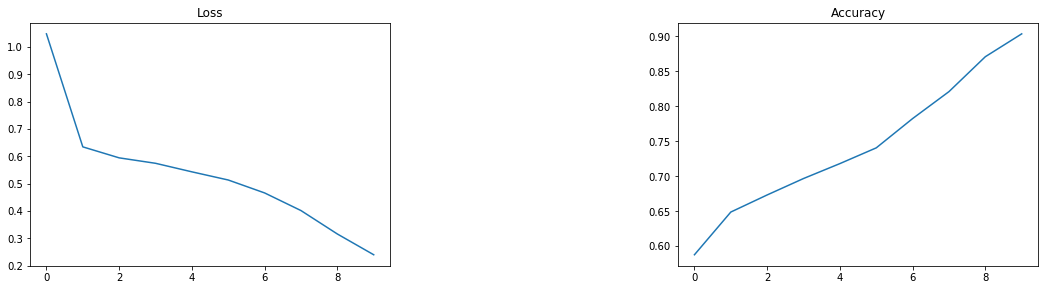

time: 311 ms


In [16]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

### Evaluate our module, use valid as test set 

In [17]:
X_test = X_valid
Y_test = Y_valid 
score = model.evaluate(X_test, Y_test, verbose=0)
score

[1.930018277883271, 0.4837310195227766]

time: 1.16 s


predict Y_hat 

In [18]:
Y_test_hat = model.predict(X_test)

time: 865 ms


In [19]:
true_label = np.argmax(Y_test, axis = 1)
pred_label = np.argmax(Y_test_hat, axis=1)

time: 3.4 ms


In [20]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(2)])
kappa = (p_observed - p_expected) / (1 - p_expected)

time: 3.87 ms


In [21]:
kappa

0.02883798328848604

time: 5.56 ms
